In [1]:
import os
os.chdir('../')
current_path = os.getcwd() 

print(current_path)

/home/lcad/blastfurnace


In [2]:
from blastfurnace.config import get_cfg
from blastfurnace.utils.defaults import default_setup
from blastfurnace.data.datasets import ArcelorMittalDataset

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import glob
import pandas as pd

/home/lcad/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
cfg = get_cfg()
cfg.merge_from_file('configs/run_max_temp/LINEAR_REG_TEMP.yaml')
cfg.freeze()

full_dataset = ArcelorMittalDataset(cfg["DATASET"])

x, y, full_x, full_y, feature_names = full_dataset.build_dataset()
splits = full_dataset.all_to_splits(x, y, full_y, full_dataset.all_x)
test_x, test_y, test_full_y, test_full_x = splits["test"]
train_x, train_y, train_full_y, train_full_x = splits["train"]


- Extrapolating features: 100%|█████████████████████████████████████████████████| 5983/5983 [00:03<00:00, 1942.31it/s]


In [5]:
test_full_x.loc[:, ('run_max_temp')] = test_y
train_full_x.loc[:, ('run_max_temp')] = train_y


/tmp/ipykernel_21078/4203894414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_full_x.loc[:, ('run_max_temp')] = test_y
/tmp/ipykernel_21078/4203894414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_full_x.loc[:, ('run_max_temp')] = train_y


In [6]:
def plot_reg_linear(dt, temperature,covariate):
    subset=dt
    x_reg = subset[temperature].values.reshape(-1, 1)
    y_reg = subset[covariate].values.reshape(-1, 1)

    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x_reg, y_reg)  # perform linear regression
    Y_pred = linear_regressor.predict(x_reg)  # make predictions

    fig, ax = plt.subplots()


    ax.scatter(subset[temperature],subset[covariate])
    plt.plot(x_reg, Y_pred, color='red')

    ax.set_ylabel(covariate)
    ax.set_xlabel(temperature)
    plt.show()

In [14]:
y_t1 = glob.glob('experiments/main_experiment/t1/linear' + "/**/*.csv", recursive = True)
y_t1_pred = pd.read_csv(y_t1[0])

test_full_x.loc[:,'y_t1'] = y_t1_pred['y_pred'].values

/tmp/ipykernel_21078/3546610826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_full_x.loc[:,'y_t1'] = y_t1_pred['y_pred'].values


In [10]:
y_t1_alter = glob.glob('**/experiments/pred.csv', recursive = True)
y_t1_alter_pred = pd.read_csv(y_t1_alter[0])

test_full_x.loc[:,'y_t1_alter'] = y_t1_alter_pred['y_pred'].values


IndexError: list index out of range

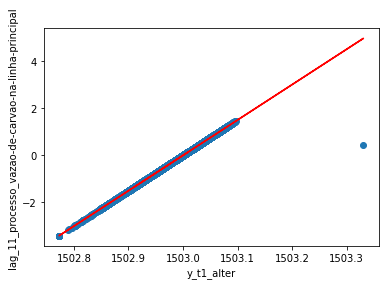

In [17]:
plot_reg_linear(test_full_x,'y_t1_alter','lag_11_processo_vazao-de-carvao-na-linha-principal')


In [9]:
y_t1_alter_treino = glob.glob('**/experiments/pred_com_treino.csv', recursive = True)
y_t1_alter_treino_pred = pd.read_csv(y_t1_alter_treino[0])

train_full_x.loc[:,'y_t1_alter_treino'] = y_t1_alter_treino_pred['y_pred'].values

/home/navarro/miniconda3/envs/blast379/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [15]:
test_full_x.loc[:,'diferenca'] = test_full_x['y_t1'] - test_full_x['run_max_temp']

/tmp/ipykernel_21078/3193176583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_full_x.loc[:,'diferenca'] = test_full_x['y_t1'] - test_full_x['run_max_temp']


In [23]:
train_full_x

,delta_time_previous30min,prev_run_max_temp,delta_time_prev_run,prev_run_same_taphole_max_temp,delta_time_prev_run_same_taphole,processo_volume-de-sopro,indices_operacionais_taxa-de-o2,processo_umidade-do-ar-de-sopro,processo_temperatura-do-ar-de-sopro,processo_vazao-de-carvao-na-linha-principal,...,lag_15_indices_operacionais_taxa-de-o2,lag_15_processo_umidade-do-ar-de-sopro,lag_15_processo_temperatura-do-ar-de-sopro,lag_15_processo_vazao-de-carvao-na-linha-principal,lag_15_processo_pressao-do-topo,lag_15_carga_peso-total-seco-coque,lag_15_carga_peso-total-de-minerio,lag_15_carga_coque-rate,lag_15_carga_minerio-rate,run_max_temp
0,0.616162,0.592593,-0.849913,0.892857,4.864646,-0.321422,0.325029,0.015190,0.850186,0.437104,...,0.303592,0.230380,0.901206,0.314932,0.0,-0.934658,-0.740596,-4.923262,-5.097123,0.857143
1,0.512907,0.592593,-0.426197,0.892857,5.227858,-0.342785,0.359212,0.000000,0.997217,0.424434,...,0.309386,0.230380,0.932282,0.202715,0.0,-0.115619,0.200371,-4.923262,-5.097123,0.857143
2,-0.645342,0.592593,-0.235674,0.892857,5.391175,-0.319819,0.300695,-0.030380,0.799165,0.477828,...,0.304751,0.227848,0.873377,0.290498,0.0,-0.247525,0.011962,-4.923262,-5.097123,0.857143
3,0.231201,0.888889,1.113123,0.857143,-1.137905,-0.193533,0.271147,-0.362025,0.925788,-0.038009,...,0.326767,0.030380,0.866419,0.284163,0.0,0.200206,0.565815,-4.923262,-5.097123,0.892857
4,0.455668,0.888889,1.609278,0.857143,-0.712600,-0.297679,0.300695,-0.374684,0.509740,0.261538,...,0.340672,0.007595,0.875232,0.167421,0.0,0.203108,0.559286,-4.923262,-5.097123,0.892857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38504,0.759820,2.333333,0.670057,1.892857,0.657310,0.204506,0.528969,1.508861,-0.976345,-0.037104,...,0.402665,1.944304,-1.868738,-0.557466,0.0,0.447242,-0.005634,0.902204,0.651528,1.071429
38505,0.010101,2.333333,0.950881,1.892857,0.898033,0.232230,0.503476,0.668354,-0.854824,0.267873,...,0.466976,1.926582,-1.886827,-0.551131,0.0,1.573206,1.167929,0.909817,0.668387,1.071429
38506,-0.698092,2.333333,1.240883,1.892857,1.146624,0.201690,0.523175,0.496203,-1.028293,0.352941,...,0.495944,1.951899,-2.010668,-0.447059,0.0,0.361274,-0.011927,0.766963,0.640903,1.071429
38507,0.769921,2.333333,1.565120,1.892857,1.424561,0.201690,0.523175,0.496203,-1.028293,0.352941,...,0.495944,1.951899,-2.010668,-0.447059,0.0,0.361274,-0.011927,0.766963,0.640903,1.071429


In [24]:
train_full_x.loc[:,'delta'] = train_full_x['run_max_temp'] - train_full_x['prev_run_same_taphole_max_temp']
train_full_x.loc[:,'media_1'] = train_full_x['lag_2_processo_vazao-de-carvao-na-linha-principal'] + train_full_x['lag_4_processo_vazao-de-carvao-na-linha-principal'] / 2
train_full_x.loc[:,'media_2'] = train_full_x['lag_4_processo_vazao-de-carvao-na-linha-principal'] + train_full_x['lag_6_processo_vazao-de-carvao-na-linha-principal'] / 2

train_full_x.loc[:,'delta_carvao'] = train_full_x['media_1'] - train_full_x['media_2']

/tmp/ipykernel_21078/1658152963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_full_x.loc[:,'delta'] = train_full_x['run_max_temp'] - train_full_x['prev_run_same_taphole_max_temp']
/tmp/ipykernel_21078/1658152963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_full_x.loc[:,'media_1'] = train_full_x['lag_2_processo_vazao-de-carvao-na-linha-principal'] + train_full_x['lag_4_processo_vazao-de-carvao-na-linha-principal'] / 2
/tmp/ipykernel_21078/1658152963.py:3: SettingWithCopyWarning: 
A v

In [25]:
train_full_x.loc[:,'delta_carvao']

0        0.255656
1        0.162443
2        0.077376
3       -0.100452
4       -0.207240
           ...   
38504    0.131674
38505    0.359729
38506    0.347059
38507    0.347059
38508    0.534842
Name: delta_carvao, Length: 38509, dtype: float64

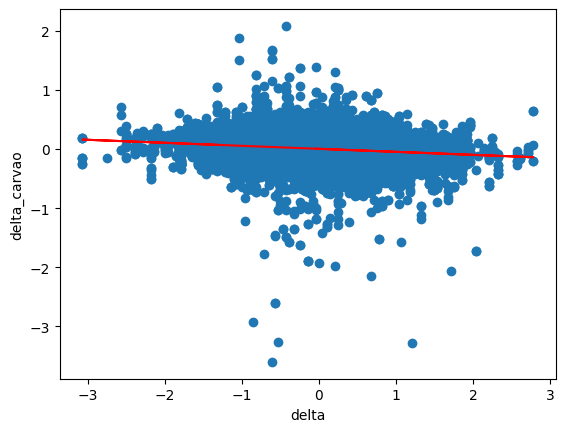

In [26]:
plot_reg_linear(train_full_x, 'delta','delta_carvao')

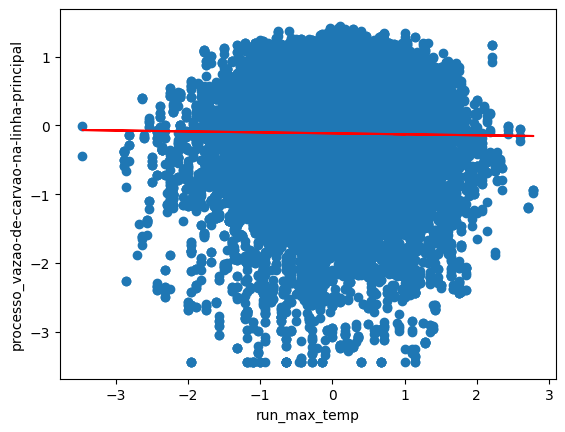

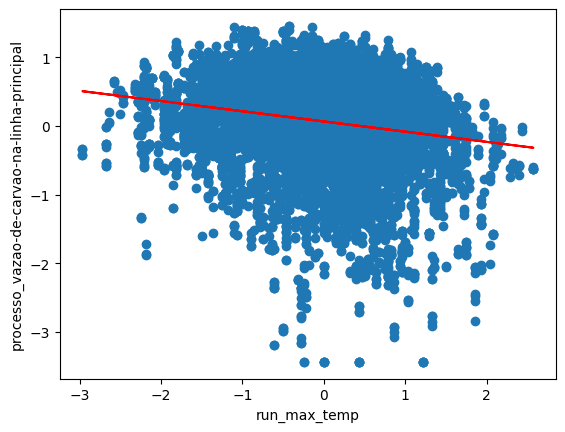

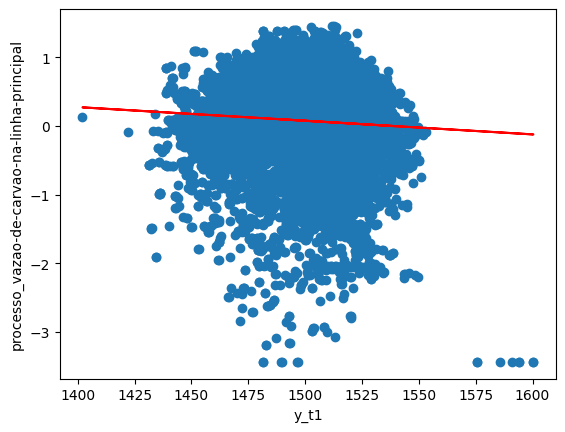

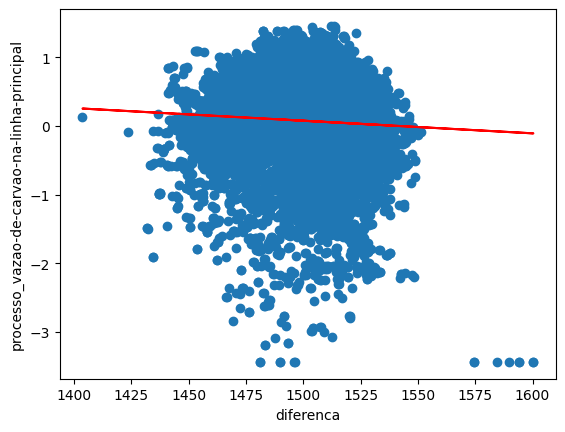

In [28]:
plot_reg_linear(train_full_x, 'run_max_temp','processo_vazao-de-carvao-na-linha-principal')
plot_reg_linear(test_full_x,'run_max_temp','processo_vazao-de-carvao-na-linha-principal')
plot_reg_linear(test_full_x,'y_t1','processo_vazao-de-carvao-na-linha-principal')
plot_reg_linear(test_full_x,'diferenca','processo_vazao-de-carvao-na-linha-principal')

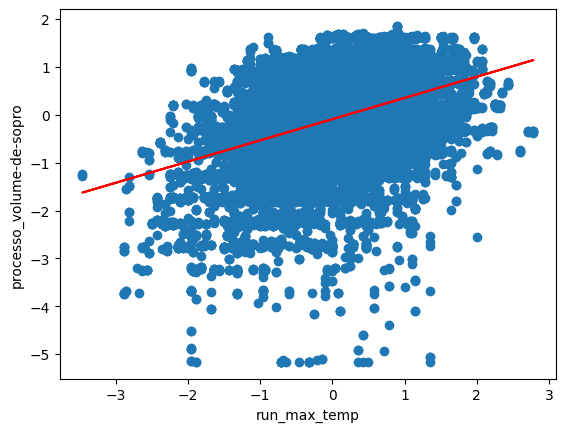

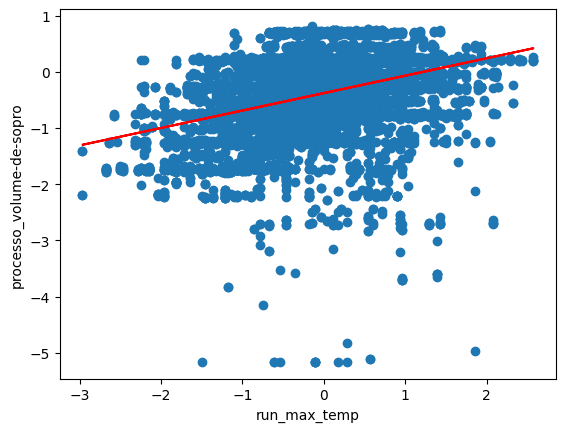

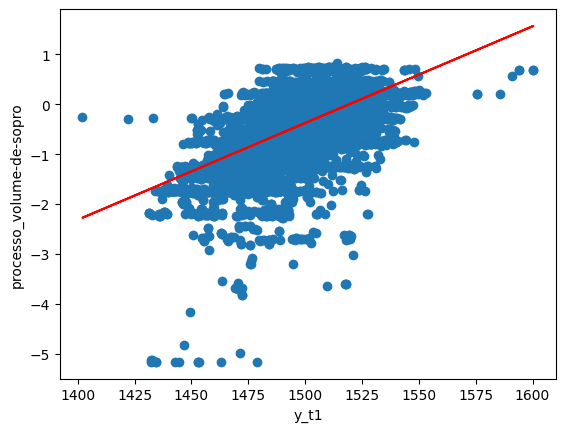

In [29]:
plot_reg_linear(train_full_x, 'run_max_temp','processo_volume-de-sopro')
plot_reg_linear(test_full_x,'run_max_temp','processo_volume-de-sopro')
plot_reg_linear(test_full_x,'y_t1','processo_volume-de-sopro')